In [23]:
# Exercise for Text Data Preprocessing: Day 1

from nltk.corpus import gutenberg
gutenberg_files = gutenberg.fileids()
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [24]:
# Reading a Document

doc = gutenberg.open('bible-kjv.txt').read()
doc[0:300]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning God created the heaven and the earth.\n\n1:2 And the earth was without form, and void; and darkness was upon\nthe face of the deep. And the Spirit of God moved upon the fac'

In [34]:
# Tokenizing

from nltk import regexp_tokenize
pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
tokens_doc = regexp_tokenize(doc, pattern)
tokens_doc[0:10]

doc_tokens = nltk.word_tokenize(doc)
doc_tagged = nltk.pos_tag(doc_tokens)
doc_tokens[0:10]
doc_tagged[0:10]

[('[', 'VB'),
 ('The', 'DT'),
 ('King', 'NNP'),
 ('James', 'NNP'),
 ('Bible', 'NNP'),
 (']', 'VBZ'),
 ('The', 'DT'),
 ('Old', 'NNP'),
 ('Testament', 'NNP'),
 ('of', 'IN')]

In [35]:
# Lemmatizing

lemma = nltk.wordnet.WordNetLemmatizer()
doc_lemma = []
for token in doc_tokens:
    doc_lemma.append(lemma.lemmatize(token))

doc_lemma[0:10]

['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of']

In [36]:
# Tagging the Lemmatized Tokens

doc_lemma_tagged = nltk.pos_tag(doc_lemma)
doc_lemma_tagged[0:30]

[('[', 'VB'),
 ('The', 'DT'),
 ('King', 'NNP'),
 ('James', 'NNP'),
 ('Bible', 'NNP'),
 (']', 'VBZ'),
 ('The', 'DT'),
 ('Old', 'NNP'),
 ('Testament', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('King', 'NNP'),
 ('James', 'NNP'),
 ('Bible', 'NNP'),
 ('The', 'DT'),
 ('First', 'NNP'),
 ('Book', 'NNP'),
 ('of', 'IN'),
 ('Moses', 'NNS'),
 (':', ':'),
 ('Called', 'VBN'),
 ('Genesis', 'NNP'),
 ('1:1', 'CD'),
 ('In', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 ('God', 'NNP'),
 ('created', 'VBD'),
 ('the', 'DT'),
 ('heaven', 'NN')]

In [38]:
# Removing Stop Words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words
len(stop_words)

179

In [42]:
stop_words.update([',', '.', '?', '!', ':', ';', '[', ']'])
filtered_words = [word for word in doc_lemma if word not in stop_words]
filtered_words[0:50]

['The',
 'King',
 'James',
 'Bible',
 'The',
 'Old',
 'Testament',
 'King',
 'James',
 'Bible',
 'The',
 'First',
 'Book',
 'Moses',
 'Called',
 'Genesis',
 '1:1',
 'In',
 'beginning',
 'God',
 'created',
 'heaven',
 'earth',
 '1:2',
 'And',
 'earth',
 'wa',
 'without',
 'form',
 'void',
 'darkness',
 'wa',
 'upon',
 'face',
 'deep',
 'And',
 'Spirit',
 'God',
 'moved',
 'upon',
 'face',
 'water',
 '1:3',
 'And',
 'God',
 'said',
 'Let',
 'light',
 'wa',
 'light']

In [26]:
# Load the tokens in a 'nltk.Text(tokens)' : 문서 하나를 편리하게 탐색할 수 있는 기능을 제공한다.

import nltk.corpus

load_tokens = nltk.Text(tokens_doc)
print(len(load_tokens))
print(len(set(load_tokens)))
load_tokens.vocab()

1010486
11


FreqDist({('', '', ''): 1010445, ('I.', '', ''): 20, ('', '-ward', ''): 10, ('', '-hadad', ''): 2, ('', '-edged', ''): 2, ('', '-beloved', ''): 2, ('', '-kiln', ''): 1, ('', '-bearer', ''): 1, ('', '-block', ''): 1, ('', '-heirs', ''): 1, ...})

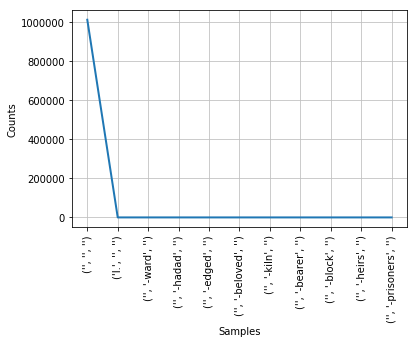

In [27]:
load_tokens.plot(30)

In [50]:
load_tokens = nltk.Text(filtered_words)
print(len(load_tokens))
print(len(set(load_tokens)))

451456
16916


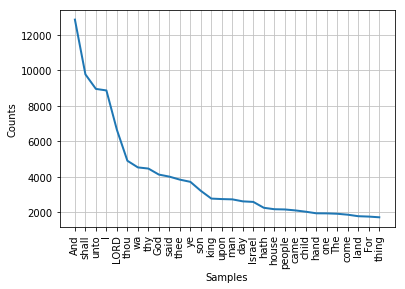

In [53]:
load_tokens.vocab()
load_tokens.plot(30)

In [58]:
# Making a List of Nouns

noun_list = []
for word, tag in doc_lemma_tagged:
    if tag in ['NNP', 'NNG']:
        noun_list.append(word)
        
noun_list[0:100]

['King',
 'James',
 'Bible',
 'Old',
 'Testament',
 'King',
 'James',
 'Bible',
 'First',
 'Book',
 'Genesis',
 'God',
 'Spirit',
 'God',
 'God',
 'God',
 'God',
 'God',
 'Day',
 'Night',
 'God',
 'God',
 'God',
 'Heaven',
 'God',
 'God',
 'Earth',
 'Seas',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'God',
 'Be',
 'God',
 'God',
 'God',
 'God',
 'Let',
 'u',
 'So',
 'God',
 'God',
 'God',
 'God',
 'Be',
 'God',
 'Behold',
 'God',
 'God',
 'God',
 'God',
 'LORD',
 'God',
 'LORD',
 'God',
 'LORD',
 'God',
 'LORD',
 'God',
 'Eden',
 'LORD',
 'God',
 'Eden',
 'Pison',
 'Havilah',
 'Gihon',
 'Ethiopia',
 'Hiddekel',
 'Assyria',
 'Euphrates',
 'LORD',
 'God',
 'Eden',
 'LORD',
 'God',
 'LORD',
 'God',
 'LORD',
 'God',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'LORD',
 'God',
 'Adam',
 'LORD',
 'God',
 'Adam',
 'Woman',
 'Man',
 'LORD',
 'God']

In [59]:
from collections import Counter
noun_counts = Counter(noun_list)
noun_counts.most_common(100)

[('LORD', 6596),
 ('God', 4088),
 ('Israel', 2570),
 ('Lord', 1058),
 ('David', 1058),
 ('O', 1054),
 ('Jesus', 973),
 ('Jerusalem', 813),
 ('Judah', 812),
 ('Moses', 669),
 ('Egypt', 603),
 ('Behold', 582),
 ('Thou', 579),
 ('Christ', 538),
 ('Saul', 414),
 ('Jacob', 372),
 ('Aaron', 346),
 ('GOD', 300),
 ('Solomon', 295),
 ('Babylon', 290),
 ('Son', 276),
 ('Pharaoh', 256),
 ('Abraham', 248),
 ('Joseph', 248),
 ('Father', 243),
 ('Joshua', 216),
 ('Go', 211),
 ('Ye', 201),
 ('Jordan', 196),
 ('My', 195),
 ('Levites', 192),
 ('Let', 184),
 ('Paul', 175),
 ('Ephraim', 170),
 ('Moab', 166),
 ('Benjamin', 166),
 ('Peter', 164),
 ('Jews', 163),
 ('Spirit', 158),
 ('Thy', 147),
 ('Manasseh', 145),
 ('Samuel', 144),
 ('Holy', 144),
 ('Joab', 142),
 ('Jeremiah', 141),
 ('Therefore', 140),
 ('A', 139),
 ('John', 138),
 ('Isaac', 132),
 ('Zion', 130),
 ('Be', 125),
 ('Hezekiah', 125),
 ('Samaria', 124),
 ('Come', 121),
 ('Gentiles', 120),
 ('Assyria', 118),
 ('Jonathan', 118),
 ('Philistines',

In [62]:
# Drawing Noun's Network Graph

unique_nouns = set()
for word, tag in doc_lemma_tagged:
    if tag in ['NNP', 'NNG']:
        unique_nouns.add(word)
        
unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
noun_index

{'twenty': 0,
 'Or': 1,
 'Eden': 2,
 'Gera': 3,
 'Nahaliel': 4,
 'Assyrian': 5,
 'Lasha': 6,
 'Areopagus': 7,
 'Goath': 8,
 'Adithaim': 9,
 'Phallu': 10,
 'Cappadocia': 11,
 'Ashtoreth': 12,
 'Thahash': 13,
 'Shethar': 14,
 'Joatham': 15,
 'Nehushtan': 16,
 'Kadesh': 17,
 'Zabad': 18,
 'Prince': 19,
 'Levite': 20,
 'Remember': 21,
 'Abdeel': 22,
 'Ho': 23,
 'THE': 24,
 'Rimmon': 25,
 'Jesse': 26,
 'Bethrehob': 27,
 'Adin': 28,
 'Ziza': 29,
 'Corban': 30,
 'Meres': 31,
 'Cononiah': 32,
 'Jotham': 33,
 'Hamulites': 34,
 'Jesaiah': 35,
 'Hizkiah': 36,
 'Abilene': 37,
 'Regemmelech': 38,
 'Achim': 39,
 'Dibri': 40,
 'Shimeath': 41,
 'Elishama': 42,
 'Aaronites': 43,
 'Baalberith': 44,
 'Aminadab': 45,
 'Melea': 46,
 'Doubtless': 47,
 'Huphamites': 48,
 'Talmon': 49,
 'Where': 50,
 'Habaziniah': 51,
 'Horeb': 52,
 'Whose': 53,
 'Athaliah': 54,
 'Mind': 55,
 'Dimonah': 56,
 'Pedaiah': 57,
 'Edar': 58,
 'Shemaah': 59,
 'Ahiman': 60,
 'Dig': 61,
 'Danjaan': 62,
 'Ain': 63,
 'THIS': 64,
 'Charr

In [63]:
noun_index['Timothy']

602

In [69]:
# 문장-단어 행렬 계산

lines = doc.splitlines()
lines

['[The King James Bible]',
 '',
 'The Old Testament of the King James Bible',
 '',
 'The First Book of Moses:  Called Genesis',
 '',
 '',
 '1:1 In the beginning God created the heaven and the earth.',
 '',
 '1:2 And the earth was without form, and void; and darkness was upon',
 'the face of the deep. And the Spirit of God moved upon the face of the',
 'waters.',
 '',
 '1:3 And God said, Let there be light: and there was light.',
 '',
 '1:4 And God saw the light, that it was good: and God divided the light',
 'from the darkness.',
 '',
 '1:5 And God called the light Day, and the darkness he called Night.',
 'And the evening and the morning were the first day.',
 '',
 '1:6 And God said, Let there be a firmament in the midst of the waters,',
 'and let it divide the waters from the waters.',
 '',
 '1:7 And God made the firmament, and divided the waters which were',
 'under the firmament from the waters which were above the firmament:',
 'and it was so.',
 '',
 '1:8 And God called the firma

In [70]:
sentences = [line for line in lines if line != '' ]
sentences

['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon',
 'the face of the deep. And the Spirit of God moved upon the face of the',
 'waters.',
 '1:3 And God said, Let there be light: and there was light.',
 '1:4 And God saw the light, that it was good: and God divided the light',
 'from the darkness.',
 '1:5 And God called the light Day, and the darkness he called Night.',
 'And the evening and the morning were the first day.',
 '1:6 And God said, Let there be a firmament in the midst of the waters,',
 'and let it divide the waters from the waters.',
 '1:7 And God made the firmament, and divided the waters which were',
 'under the firmament from the waters which were above the firmament:',
 'and it was so.',
 '1:8 And God called the firmament Heaven. And the evening and the',
 'morning were t

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(unique_nouns)
X

<4233x4047 sparse matrix of type '<class 'numpy.int64'>'
	with 4117 stored elements in Compressed Sparse Row format>

In [100]:
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1

import pandas as pd
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('bible_nouns.csv', sep = ',')

KeyboardInterrupt: 

c:\users\안신혜\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


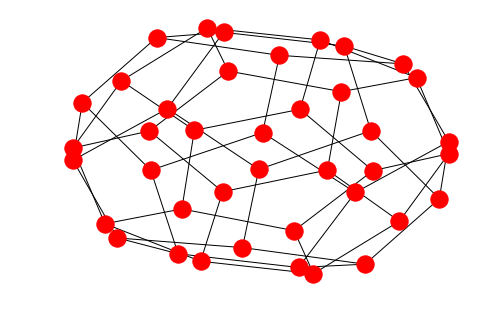

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

G=nx.dodecahedral_graph()
nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G)) # use spring layout